In [ ]:
#Practica de git + git hub
print("primer cambio en el cuaderno .ipynb")

: 

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import ParameterSampler
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import plotly.express as px

warnings.filterwarnings('ignore')  # Ignore warning messages

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Union de los datasets

In [115]:
# Ruta del archivo CSV (ajusta la ruta según sea necesario)
OPEP2019 = "DATA/data_2019.csv"

# Leer el archivo CSV utilizando pandas
df1 = pd.read_csv(OPEP2019, sep=';', decimal='�', encoding='latin-1')

# Mostrar el DataFrame para verificar que los datos se han cargado correctamente
print(df1)

          Fecha Precio $
0    02/01/2019  52,14Ê$
1    03/01/2019  52,93Ê$
2    04/01/2019  55,13Ê$
3    07/01/2019  56,42Ê$
4    08/01/2019  56,09Ê$
..          ...      ...
253  24/12/2019  67,99Ê$
254  26/12/2019  68,48Ê$
255  27/12/2019  69,07Ê$
256  30/12/2019  68,89Ê$
257  31/12/2019  67,96Ê$

[258 rows x 2 columns]


In [116]:
df1['Precio $'] = df1['Precio $'].str.replace('Ê', ' ')

df1['Fecha'] = pd.to_datetime(df1['Fecha'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

# Mostrar el DataFrame actualizado
print(df1)

          Fecha Precio $
0    2019-01-02  52,14 $
1    2019-01-03  52,93 $
2    2019-01-04  55,13 $
3    2019-01-07  56,42 $
4    2019-01-08  56,09 $
..          ...      ...
253  2019-12-24  67,99 $
254  2019-12-26  68,48 $
255  2019-12-27  69,07 $
256  2019-12-30  68,89 $
257  2019-12-31  67,96 $

[258 rows x 2 columns]


In [117]:
df1['Precio $'] = df1['Precio $'].str.replace('\$', '', regex=True)

print(df1)

          Fecha Precio $
0    2019-01-02   52,14 
1    2019-01-03   52,93 
2    2019-01-04   55,13 
3    2019-01-07   56,42 
4    2019-01-08   56,09 
..          ...      ...
253  2019-12-24   67,99 
254  2019-12-26   68,48 
255  2019-12-27   69,07 
256  2019-12-30   68,89 
257  2019-12-31   67,96 

[258 rows x 2 columns]


In [118]:
# Renombrar las columnas 'Fecha' y 'Precio $'
df1 = df1.rename(columns={'Fecha': 'FECHA', 'Precio $': 'PRECIO'})

# Mostrar el DataFrame actualizado
print(df1)

          FECHA  PRECIO
0    2019-01-02  52,14 
1    2019-01-03  52,93 
2    2019-01-04  55,13 
3    2019-01-07  56,42 
4    2019-01-08  56,09 
..          ...     ...
253  2019-12-24  67,99 
254  2019-12-26  68,48 
255  2019-12-27  69,07 
256  2019-12-30  68,89 
257  2019-12-31  67,96 

[258 rows x 2 columns]


In [119]:
# Ruta del archivo CSV (ajusta la ruta según sea necesario)
OPEP2020 = "/Users/leidygarciaguzman/Documents/PRECIO OPEP /DATA/OPEP 2020.csv"

# Leer el archivo CSV utilizando pandas
df2 = pd.read_csv(OPEP2020, sep=';', decimal=',')

# Mostrar el DataFrame para verificar que los datos se han cargado correctamente
print(df2)

         Fecha  Precio USD/BBL
0    2020-01-02        67,12 $
1    2020-01-03        69,38 $
2    2020-01-06        70,87 $
3    2020-01-07        69,60 $
4    2020-01-08        69,58 $
..          ...            ...
234  2020-11-24        45,51 $
235  2020-11-25        46,91 $
236  2020-11-26        46,66 $
237  2020-11-27        46,79 $
238  2020-11-30        46,43 $

[239 rows x 2 columns]


In [120]:
# Eliminar el signo '$' de toda la columna 'Precio USD/BBL'
df2['Precio USD/BBL'] = df2['Precio USD/BBL'].str.replace('\$', '', regex=True)

# Mostrar el DataFrame actualizado
print(df2)

         Fecha  Precio USD/BBL
0    2020-01-02         67,12 
1    2020-01-03         69,38 
2    2020-01-06         70,87 
3    2020-01-07         69,60 
4    2020-01-08         69,58 
..          ...            ...
234  2020-11-24         45,51 
235  2020-11-25         46,91 
236  2020-11-26         46,66 
237  2020-11-27         46,79 
238  2020-11-30         46,43 

[239 rows x 2 columns]


In [121]:
df2.columns 

Index(['Fecha ', 'Precio USD/BBL'], dtype='object')

In [122]:
# Renombrar las columnas 'Fecha' y 'Precio $'
df2 = df2.rename(columns={'Fecha ': 'FECHA', 'Precio USD/BBL': 'PRECIO'})

# Mostrar el DataFrame actualizado
print(df2)

          FECHA  PRECIO
0    2020-01-02  67,12 
1    2020-01-03  69,38 
2    2020-01-06  70,87 
3    2020-01-07  69,60 
4    2020-01-08  69,58 
..          ...     ...
234  2020-11-24  45,51 
235  2020-11-25  46,91 
236  2020-11-26  46,66 
237  2020-11-27  46,79 
238  2020-11-30  46,43 

[239 rows x 2 columns]


In [123]:
# Ruta del archivo CSV (ajusta la ruta según sea necesario)
OPEP2021 = "DATA/data_2021.csv"

# Leer el archivo CSV utilizando pandas
df3 = pd.read_csv(OPEP2021, sep=';', decimal='�', encoding='latin-1')

# Mostrar el DataFrame para verificar que los datos se han cargado correctamente
print(df3)

          Fecha Precio $
0    04/01/2021  51,35Ê$
1    05/01/2021  50,75Ê$
2    06/01/2021  53,29Ê$
3    07/01/2021  53,84Ê$
4    08/01/2021  54,39Ê$
..          ...      ...
254  27/12/2021  75,63Ê$
255  28/12/2021  77,39Ê$
256  29/12/2021  78,17Ê$
257  30/12/2021  78,33Ê$
258  31/12/2021  77,97Ê$

[259 rows x 2 columns]


In [124]:
df3['Precio $'] = df3['Precio $'].str.replace('Ê', ' ')

# Mostrar el DataFrame actualizado
print(df3)

          Fecha Precio $
0    04/01/2021  51,35 $
1    05/01/2021  50,75 $
2    06/01/2021  53,29 $
3    07/01/2021  53,84 $
4    08/01/2021  54,39 $
..          ...      ...
254  27/12/2021  75,63 $
255  28/12/2021  77,39 $
256  29/12/2021  78,17 $
257  30/12/2021  78,33 $
258  31/12/2021  77,97 $

[259 rows x 2 columns]


In [125]:
# Eliminar el signo '$' de toda la columna 'Precio $'
df3['Precio $'] = df3['Precio $'].str.replace('\$', '', regex=True)

df3['Fecha'] = pd.to_datetime(df3['Fecha'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
# Mostrar el DataFrame actualizado
print(df3)

          Fecha Precio $
0    2021-01-04   51,35 
1    2021-01-05   50,75 
2    2021-01-06   53,29 
3    2021-01-07   53,84 
4    2021-01-08   54,39 
..          ...      ...
254  2021-12-27   75,63 
255  2021-12-28   77,39 
256  2021-12-29   78,17 
257  2021-12-30   78,33 
258  2021-12-31   77,97 

[259 rows x 2 columns]


In [126]:
# Renombrar las columnas 'Fecha' y 'Precio $'
df3 = df3.rename(columns={'Fecha': 'FECHA', 'Precio $': 'PRECIO'})

# Mostrar el DataFrame actualizado
print(df3)

          FECHA  PRECIO
0    2021-01-04  51,35 
1    2021-01-05  50,75 
2    2021-01-06  53,29 
3    2021-01-07  53,84 
4    2021-01-08  54,39 
..          ...     ...
254  2021-12-27  75,63 
255  2021-12-28  77,39 
256  2021-12-29  78,17 
257  2021-12-30  78,33 
258  2021-12-31  77,97 

[259 rows x 2 columns]


In [127]:
# Ruta del archivo CSV (ajusta la ruta según sea necesario)
OPEP2022 = "/Users/leidygarciaguzman/Documents/PRECIO OPEP /DATA/OPEP 2022.csv"

# Leer el archivo CSV utilizando pandas
df4 = pd.read_csv(OPEP2022, sep=';', decimal=',')

# Mostrar el DataFrame para verificar que los datos se han cargado correctamente
print(df4)

     Unnamed: 0 Unnamed: 1  Unnamed: 2
0    2022-01-03    78,00 $         NaN
1    2022-01-04    78,93 $         NaN
2    2022-01-05    80,07 $         NaN
3    2022-01-06    80,80 $         NaN
4    2022-01-07    82,16 $         NaN
..          ...        ...         ...
253  2022-12-23    80,58 $         NaN
254  2022-12-27    82,23 $         NaN
255  2022-12-28    81,96 $         NaN
256  2022-12-29    80,39 $         NaN
257  2022-12-30    81,29 $         NaN

[258 rows x 3 columns]


In [128]:
# Eliminar la columna "Unnamed: 2"
df4.drop(columns=['Unnamed: 2'], inplace=True)

# Renombrar las columnas
df4.rename(columns={'Unnamed: 0': 'FECHA', 'Unnamed: 1': 'PRECIO'}, inplace=True)

# Mostrar el DataFrame actualizado
print(df4)

          FECHA   PRECIO
0    2022-01-03  78,00 $
1    2022-01-04  78,93 $
2    2022-01-05  80,07 $
3    2022-01-06  80,80 $
4    2022-01-07  82,16 $
..          ...      ...
253  2022-12-23  80,58 $
254  2022-12-27  82,23 $
255  2022-12-28  81,96 $
256  2022-12-29  80,39 $
257  2022-12-30  81,29 $

[258 rows x 2 columns]


In [129]:
# Eliminar el signo '$' de toda la columna 'Precio $'
df4['PRECIO'] = df4['PRECIO'].str.replace('\$', '', regex=True)

# Mostrar el DataFrame actualizado
print(df4)

          FECHA  PRECIO
0    2022-01-03  78,00 
1    2022-01-04  78,93 
2    2022-01-05  80,07 
3    2022-01-06  80,80 
4    2022-01-07  82,16 
..          ...     ...
253  2022-12-23  80,58 
254  2022-12-27  82,23 
255  2022-12-28  81,96 
256  2022-12-29  80,39 
257  2022-12-30  81,29 

[258 rows x 2 columns]


In [130]:
# Ruta del archivo CSV (ajusta la ruta según sea necesario)
OPEP2023 = "/Users/leidygarciaguzman/Documents/PRECIO OPEP /DATA/data_2023.csv"

# Leer el archivo CSV utilizando pandas
df5 = pd.read_csv(OPEP2023, sep=';', decimal='�', encoding='latin-1')

# Mostrar el DataFrame para verificar que los datos se han cargado correctamente
print(df5)

          Fecha Precio $
0    03/01/2023  82,07Ê$
1    04/01/2023  76,90Ê$
2    05/01/2023  75,79Ê$
3    06/01/2023  76,15Ê$
4    09/01/2023  77,57Ê$
..          ...      ...
142  21/07/2023  81,99Ê$
143  24/07/2023  83,19Ê$
144  25/07/2023  84,64Ê$
145  26/07/2023  84,82Ê$
146  27/07/2023  84,88Ê$

[147 rows x 2 columns]


In [131]:
df5['Precio $'] = df5['Precio $'].str.replace('Ê', ' ')

# Mostrar el DataFrame actualizado
print(df5)

          Fecha Precio $
0    03/01/2023  82,07 $
1    04/01/2023  76,90 $
2    05/01/2023  75,79 $
3    06/01/2023  76,15 $
4    09/01/2023  77,57 $
..          ...      ...
142  21/07/2023  81,99 $
143  24/07/2023  83,19 $
144  25/07/2023  84,64 $
145  26/07/2023  84,82 $
146  27/07/2023  84,88 $

[147 rows x 2 columns]


In [132]:
# Eliminar el signo '$' de toda la columna 'Precio $'
df5['Precio $'] = df5['Precio $'].str.replace('\$', '', regex=True)

df5['Fecha'] = pd.to_datetime(df5['Fecha'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
# Mostrar el DataFrame actualizado
print(df5)

          Fecha Precio $
0    2023-01-03   82,07 
1    2023-01-04   76,90 
2    2023-01-05   75,79 
3    2023-01-06   76,15 
4    2023-01-09   77,57 
..          ...      ...
142  2023-07-21   81,99 
143  2023-07-24   83,19 
144  2023-07-25   84,64 
145  2023-07-26   84,82 
146  2023-07-27   84,88 

[147 rows x 2 columns]


In [133]:
# Renombrar las columnas 'Fecha' y 'Precio $'
df5 = df5.rename(columns={'Fecha': 'FECHA', 'Precio $': 'PRECIO'})

# Mostrar el DataFrame actualizado
print(df5)

          FECHA  PRECIO
0    2023-01-03  82,07 
1    2023-01-04  76,90 
2    2023-01-05  75,79 
3    2023-01-06  76,15 
4    2023-01-09  77,57 
..          ...     ...
142  2023-07-21  81,99 
143  2023-07-24  83,19 
144  2023-07-25  84,64 
145  2023-07-26  84,82 
146  2023-07-27  84,88 

[147 rows x 2 columns]


    UNIMOS LOS 5 DATAFRAME 

In [134]:
# Crea una lista con los DataFrames que deseas unir
df = [df1, df2, df3, df4, df5]

# Concatena los DataFrames en orden por años
OPEP = pd.concat(df)

# Mostrar el DataFrame resultante
print(OPEP)

          FECHA  PRECIO
0    2019-01-02  52,14 
1    2019-01-03  52,93 
2    2019-01-04  55,13 
3    2019-01-07  56,42 
4    2019-01-08  56,09 
..          ...     ...
142  2023-07-21  81,99 
143  2023-07-24  83,19 
144  2023-07-25  84,64 
145  2023-07-26  84,82 
146  2023-07-27  84,88 

[1161 rows x 2 columns]


# Exploratory Data Analysis EDA

In [135]:
OPEP.head(20)

,FECHA,PRECIO
0,2019-01-02,"52,14"
1,2019-01-03,"52,93"
2,2019-01-04,"55,13"
3,2019-01-07,"56,42"
4,2019-01-08,"56,09"
5,2019-01-09,"58,22"
6,2019-01-10,"59,46"
7,2019-01-11,"60,00"
8,2019-01-14,"58,39"
9,2019-01-15,"58,24"


In [136]:
OPEP.tail()

,FECHA,PRECIO
142,2023-07-21,"81,99"
143,2023-07-24,"83,19"
144,2023-07-25,"84,64"
145,2023-07-26,"84,82"
146,2023-07-27,"84,88"


In [137]:
OPEP.describe(include='all')

,FECHA,PRECIO
count,1161,1161
unique,1158,1077
top,2020-08-31,"65,60"
freq,2,3


In [138]:
OPEP.to_csv('OPEP_data.csv', index=True)

In [139]:
OPEP_copia = OPEP.copy()

In [140]:
OPEP.shape

(1161, 2)

In [141]:
# Mostrar los nombres de las columnas actuales
print(OPEP.columns)

Index(['FECHA', 'PRECIO'], dtype='object')


In [142]:
OPEP.shape 

(1161, 2)

In [143]:
OPEP.isna().mean()*100

FECHA     0.0
PRECIO    0.0
dtype: float64

In [144]:
# Verificar los valores faltantes en el DataFrame OPEP
missing_values = OPEP.isnull().sum()

# Mostrar el total de valores faltantes por columna
print(missing_values)

FECHA     0
PRECIO    0
dtype: int64


In [145]:
OPEP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   1161 non-null   object
 1   PRECIO  1161 non-null   object
dtypes: object(2)
memory usage: 27.2+ KB


In [146]:
OPEP['FECHA'] = pd.to_datetime(OPEP['FECHA'])
OPEP.set_index('FECHA', inplace=True)

# Mostrar el DataFrame actualizado
print(OPEP)

            PRECIO
FECHA             
2019-01-02  52,14 
2019-01-03  52,93 
2019-01-04  55,13 
2019-01-07  56,42 
2019-01-08  56,09 
...            ...
2023-07-21  81,99 
2023-07-24  83,19 
2023-07-25  84,64 
2023-07-26  84,82 
2023-07-27  84,88 

[1161 rows x 1 columns]


In [147]:
# Calcular la fecha inicial y fecha final
fecha_inicial = OPEP.index.min()
fecha_final = OPEP.index.max()

# Calcular el número de días entre las fechas
num_dias = (fecha_final - fecha_inicial).days + 1

# Imprimir los resultados
print('Fecha inicial:', fecha_inicial)
print('Fecha final:', fecha_final)
print('Número de días:', num_dias)


Fecha inicial: 2019-01-02 00:00:00
Fecha final: 2023-07-27 00:00:00
Número de días: 1668


In [148]:
# Redefinir el índice con el formato de año-mes-día
OPEP.index = OPEP.index.strftime('%Y-%m-%d')

# Mostrar el DataFrame actualizado
print(OPEP)

            PRECIO
FECHA             
2019-01-02  52,14 
2019-01-03  52,93 
2019-01-04  55,13 
2019-01-07  56,42 
2019-01-08  56,09 
...            ...
2023-07-21  81,99 
2023-07-24  83,19 
2023-07-25  84,64 
2023-07-26  84,82 
2023-07-27  84,88 

[1161 rows x 1 columns]


In [149]:
print(OPEP['PRECIO'].dtype)

object


In [150]:
fecha_inicial = OPEP.index.min()
print(fecha_inicial)

2019-01-02


In [151]:
# Convertir los valores de la columna 'PRECIO' a números con coma decimal en lugar de punto decimal
OPEP['PRECIO'] = OPEP['PRECIO'].str.replace(',', '.').astype(float)

# Cambiar el nombre de la columna 'PRECIO' a 'PRECIO OPEP'
OPEP.rename(columns={'PRECIO': 'PRECIO OPEP'}, inplace=True)
# Redondear los valores a un decimal
OPEP['PRECIO OPEP'] = OPEP['PRECIO OPEP'].round(2)


In [152]:
OPEP.describe()

,PRECIO OPEP
count,1161.000000
mean,70.538277
std,21.987607
min,12.220000
25%,60.020000
50%,69.880000
75%,82.300000
max,128.460000


In [153]:
OPEP.head()

,PRECIO OPEP
FECHA,
2019-01-02,52.14
2019-01-03,52.93
2019-01-04,55.13
2019-01-07,56.42
2019-01-08,56.09


## Data Visualization

In [154]:
# Graficar los datos
fig = px.line(OPEP, x=OPEP.index, y='PRECIO OPEP', title='Precio del petróleo OPEP (USD/BBL) a lo largo del tiempo')
fig.show()

In [155]:
# Redefinir el índice con el formato de año-mes-día
OPEP.index = pd.to_datetime(OPEP.index)

# Filtrar los datos por año
df_2019 = OPEP[OPEP.index.year == 2019]
df_2020 = OPEP[OPEP.index.year == 2020]
df_2021 = OPEP[OPEP.index.year == 2021]
df_2022 = OPEP[OPEP.index.year == 2022]
df_2023 = OPEP[OPEP.index.year == 2023]

# Crear el gráfico de líneas para cada año
fig_2019 = px.line(df_2019, x=df_2019.index, y='PRECIO OPEP', title='Precio del petróleo OPEP (USD/BBL) - 2019')
fig_2020 = px.line(df_2020, x=df_2020.index, y='PRECIO OPEP', title='Precio del petróleo OPEP (USD/BBL) - 2020')
fig_2021 = px.line(df_2021, x=df_2021.index, y='PRECIO OPEP', title='Precio del petróleo OPEP (USD/BBL) - 2021')
fig_2022 = px.line(df_2022, x=df_2022.index, y='PRECIO OPEP', title='Precio del petróleo OPEP (USD/BBL) - 2022')
fig_2023 = px.line(df_2023, x=df_2023.index, y='PRECIO OPEP', title='Precio del petróleo OPEP (USD/BBL) - 2023')

# Mostrar los gráficos individualmente
fig_2019.show()
fig_2020.show()
fig_2021.show()
fig_2022.show()
fig_2023.show()


# MODELO SARIMAX

### Test de estacionariedad

Como se puede observar, hay una tendencia en el tiempo y eso sugiere que los datos no son estacionarios. Sin embargo, para asegurar la estacionariedad de la serie, utilizamos el test Dickey-Fuller.

In [156]:
OPEP_copia['PRECIO'] = OPEP_copia['PRECIO'].str.replace(',', '.').astype(float)
# Establecer la columna 'FECHA' como índice
OPEP_copia.set_index('FECHA', inplace=True)

In [157]:
result_OPEP = adfuller(OPEP_copia['PRECIO'])
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'], result_OPEP))

{'adf': -1.5617904178661435,
 'pvalue': 0.5027536130313731,
 'usedlag': 17,
 'nobs': 1143,
 'criticalvalues': {'1%': -3.4360840741163168,
  '5%': -2.864071964072552,
  '10%': -2.568118081861596},
 'icbest': 4375.9051048424735}

        pvalue > 0.05 ---->.  0.50275 > 0.05, NO ES ESTACIONARIO
Para corregir la no estacionariedad, necesitamos diferenciar el valor de nuestra serie de tiempo: restar la observación anterior de la observación actual.

- diferencia(T) = observación(T) — observación(T-1)

In [158]:
OPEP_copia['OPEP1'] = OPEP_copia['PRECIO'] - OPEP_copia['PRECIO'].shift(1)
OPEP_copia.head()

,PRECIO,OPEP1
FECHA,,
2019-01-02,52.14,NaN
2019-01-03,52.93,0.79
2019-01-04,55.13,2.20
2019-01-07,56.42,1.29
2019-01-08,56.09,-0.33


In [159]:
px.line(OPEP_copia['OPEP1']) #Valor pasado menos el presente

In [160]:
result_OPEP1 = adfuller(OPEP_copia['OPEP1'].dropna())#dropna es para quitar los nulos porque sino no funciona. 
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'], result_OPEP1))

{'adf': -6.705036630557044,
 'pvalue': 3.8040307854707524e-09,
 'usedlag': 16,
 'nobs': 1143,
 'criticalvalues': {'1%': -3.4360840741163168,
  '5%': -2.864071964072552,
  '10%': -2.568118081861596},
 'icbest': 4373.250646343316}

    pvalue <  0.05 ---->.  3.804 <  0.05,  ES ESTACIONARIO

    Para el modelo, utilizamos: 

        d=1

In [161]:
OPEP_copia['OPEP12'] = OPEP_copia['PRECIO'] - OPEP_copia['PRECIO'].shift(12)
OPEP_copia.head(14)

,PRECIO,OPEP1,OPEP12
FECHA,,,
2019-01-02,52.14,NaN,NaN
2019-01-03,52.93,0.79,NaN
2019-01-04,55.13,2.20,NaN
2019-01-07,56.42,1.29,NaN
2019-01-08,56.09,-0.33,NaN
2019-01-09,58.22,2.13,NaN
2019-01-10,59.46,1.24,NaN
2019-01-11,60.00,0.54,NaN
2019-01-14,58.39,-1.61,NaN


In [162]:
px.line(OPEP_copia['OPEP12'])


In [163]:
result_OPEP12 = adfuller((OPEP_copia['OPEP12']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'], result_OPEP12))

{'adf': -6.019569775700061,
 'pvalue': 1.50501176142666e-07,
 'usedlag': 21,
 'nobs': 1127,
 'criticalvalues': {'1%': -3.4361656672131806,
  '5%': -2.864107957764881,
  '10%': -2.568137251515397},
 'icbest': 4757.084433657213}

    pvalue <  0.05 ---->.  1.505e-07 <  0.05

    Para el modelo, utilizamos: 

        D=0

### Test de autocorrelación

In [164]:
OPEP_copia.head()

,PRECIO,OPEP1,OPEP12
FECHA,,,
2019-01-02,52.14,NaN,NaN
2019-01-03,52.93,0.79,NaN
2019-01-04,55.13,2.20,NaN
2019-01-07,56.42,1.29,NaN
2019-01-08,56.09,-0.33,NaN


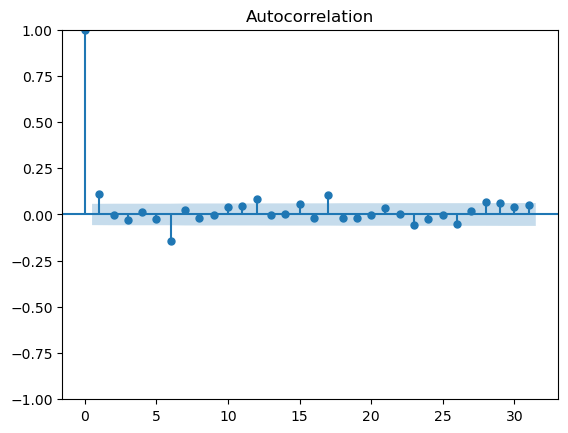

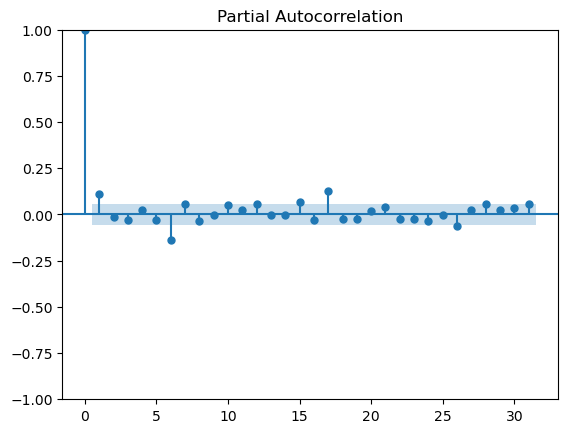

In [165]:
OPEP1_acf = plot_acf(OPEP_copia['OPEP1'].dropna())
OPEP1_pacf = plot_pacf(OPEP_copia['OPEP1'].dropna())


        No podemos ver cortes claros en ninguno de los gráficos. Sin embargo, hay retrasos significativos en ambos gráficos. Esto sugiere usar un término AR y MA. 
        
        En el modelo experimentemos con:
        
        p = 1 
        q = 1. 
        
    Necesitamos hacer un análisis similar con el componente estacional.

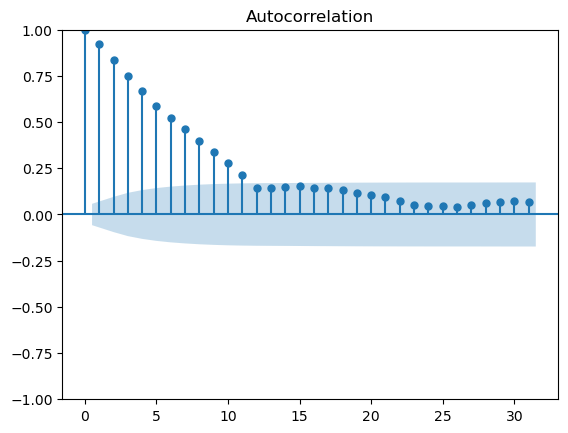

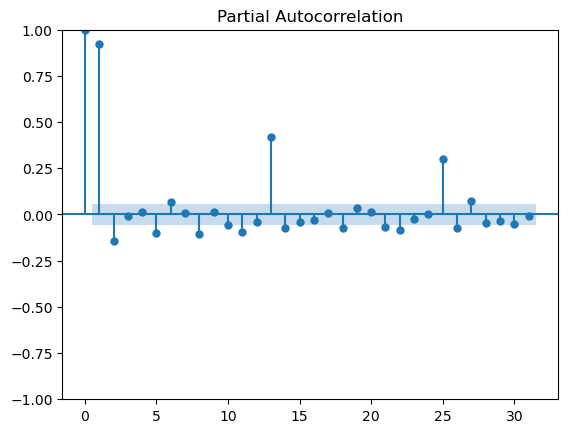

In [166]:
#Seasonal componet
OPEP12_acf = plot_acf(OPEP_copia['OPEP12'].dropna())
OPEP12_pacf = plot_pacf(OPEP_copia['OPEP12'].dropna())

        En el modelo experimentemos con:
        
        P = 3 (tiene correlación en un rango de 0-11) 
        Q = 3 (tiene mas correlacion de 0 a 3) 

### Adjuntamos el precio de WTI como variable exógena 

In [167]:
wti = '/Users/leidygarciaguzman/Documents/PRECIO OPEP /DATA/wti.csv'


# Leer el archivo CSV utilizando pandas
WTI = pd.read_csv(wti, sep=';')

# Mostrar el DataFrame para verificar que los datos se han cargado correctamente
print(WTI)

             FECHA,PRECIO
0     2019-01-02,"52,14 "
1     2019-01-03,"52,93 "
2     2019-01-04,"55,13 "
3     2019-01-07,"56,42 "
4     2019-01-08,"56,09 "
...                   ...
1156  2023-07-21,"81,99 "
1157  2023-07-24,"83,19 "
1158  2023-07-25,"84,64 "
1159  2023-07-26,"84,82 "
1160  2023-07-27,"84,88 "

[1161 rows x 1 columns]


In [112]:
# Define a range of hyperparameters to test
param_dist = {"order": [(p, d, q) for p in range(3) for d in [0, 1, 2] for q in range(3)],
    "seasonal_order": [(P, D, Q, 12) for P in range(3) for D in [0, 1, 2] for Q in range(3)]}


# Initialize a random parameter sampler
param_list = list(ParameterSampler(param_dist, n_iter=50))


# Define Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=4)


best_aic = np.inf
best_bic = np.inf
best_params = None

In [113]:
# Cross-validation and hyperparameter tuning
for params in param_list:
    aic_scores = []
    bic_scores = []

    # Cross-validation loop
    for train_index, test_index in tscv.split(OPEP):
        train_index_list = list(train_index)
        test_index_list = list(test_index)

        cv_train = OPEP.iloc[train_index_list]
        cv_test = OPEP.iloc[test_index_list]

        # Fit SARIMAX model
        sarima = SARIMAX(cv_train['PRECIO OPEP'], exog=cv_train['PRECIO OPEP'],
                         order=params['order'], seasonal_order=params['seasonal_order'])
        sarima_results = sarima.fit()

        # Save AIC and BIC scores
        aic_scores.append(sarima_results.aic)
        bic_scores.append(sarima_results.bic)

    # Average AIC and BIC scores
    mean_aic = np.mean(aic_scores)
    mean_bic = np.mean(bic_scores)

    # Update best parameters if current model has a lower AIC and BIC
    if mean_aic < best_aic and mean_bic < best_bic:
        best_aic = mean_aic
        best_bic = mean_bic
        best_params = params

# Print the best parameters and the corresponding AIC and BIC
print('Best parameters:', best_params)
print('Best AIC:', best_aic)
print('Best BIC:', best_bic)

# Fit the best model
best_model = SARIMAX(OPEP['PRECIO OPEP'], exog=OPEP['PRECIO OPEP'],
                     order=best_params['order'], seasonal_order=best_params['seasonal_order'])
best_model_fit = best_model.fit()


# Define future US Dollar Index
future_WTI_price = [101.64, 103.06, 103.66, 104.33, 103.57, 102.59, 99.42, 99.48, 101.97, 102.85, 103.33, 102.4, 
                          101.23, 100.08, 99.78, 98.72, 97.62, 98.34]


# Create forecast object
forecast_object = best_model_fit.get_forecast(steps=18, exog=np.array(future_WTI_price).reshape(-1, 1),alpha=0.2)






# Extract prediction mean
mean = forecast_object.predicted_mean


# Extract the forecast dates
datescf = pd.date_range(start=df.index[-1], periods=18, freq='MS')


# Predictions on historical data
in_sample_forecast = best_model_fit.get_prediction(start=pd.to_datetime('2019-01-02'), 
                                                   end=df.index[-1], 
                                                   dynamic=False, 
                                                   exog=df['PRECIO OPEP'][df.index >= pd.to_datetime('2019-01-02')])


in_sample_mean = in_sample_forecast.predicted_mean


# Replace negative predicted values with 0
in_sample_mean[in_sample_mean < 0] = 0




# Confidence intervals for the in-sample data
in_sample_conf_int = in_sample_forecast.conf_int()


# Correct any negative lower confidence levels in the in-sample data
in_sample_conf_int[in_sample_conf_int.iloc[:, 0] < 0] = 0


# Confidence intervals for the out-of-sample data
conf_int = best_model_fit.get_forecast(steps=len(future_WTI_price), exog=future_WTI_price).conf_int()


# Correct any negative lower confidence levels in the out-of-sample data
conf_int[conf_int.iloc[:, 0] < 0] = 0


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36469D-01    |proj g|=  9.19874D+05


 This problem is unconstrained.



At iterate    5    f= -7.82613D+00    |proj g|=  1.25886D+04
  ys=-1.584E+00  -gs= 6.584E-01 BFGS update SKIPPED
  ys=-1.114E-01  -gs= 6.798E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8    105      2     2     0   9.287D+04  -9.084D+00
  F =  -9.0841870307908970     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00719D+01    |proj g|=  2.17711D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     74      2     0     0   1.870D+05  -1.008D+01
  F =  -10.075700065142469     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.78923D-01    |proj g|=  3.18753D+06


 This problem is unconstrained.



At iterate    5    f= -6.87954D+00    |proj g|=  1.98322D+04

At iterate   10    f= -7.50682D+00    |proj g|=  4.25059D+03

At iterate   15    f= -8.63304D+00    |proj g|=  3.47520D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     82      2     0     0   1.184D+09  -9.783D+00
  F =  -9.7829211318014373     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03327D+01    |proj g|=  2.77029D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     84      2     0     0   2.372D+05  -1.034D+01
  F =  -10.335971981794524     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.71976D-01    |proj g|=  1.54963D+05
  ys=-1.366E-15  -gs= 5.008E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     64      2     1     0   1.106D+05  -2.006D-01
  F = -0.20057867093376011     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.51603D-02    |proj g|=  8.00581D+04



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -7.68846D+00    |proj g|=  7.88959D+03

At iterate   10    f= -7.90232D+00    |proj g|=  1.74169D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     74      2     0     0   1.642D+04  -8.397D+00
  F =  -8.3968580821935568     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.84519D-03    |proj g|=  3.15672D+03

At iterate    5    f= -1.72892D+00    |proj g|=  7.80584D+01
  ys=-7.690E+00  -gs= 9.412E-01 BFGS update SKIPPED

At iterate   10    f= -5.89173D+00    |proj g|=  1.00374D+04



 Nonpositive definiteness in Cholesky factorization in formt;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f= -7.66106D+00    |proj g|=  2.82217D+04

At iterate   20    f= -8.10305D+00    |proj g|=  1.01609D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24    139      3     1     0   1.138D+04  -8.142D+00
  F =  -8.1418247920486717     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.52733D-02    |proj g|=  5.32424D+06


 This problem is unconstrained.



At iterate    5    f= -5.60391D-02    |proj g|=  7.44797D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     67      2     0     0   7.448D+04  -5.604D-02
  F =  -5.6039118164493210E-002

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.48100D+00    |proj g|=  1.24259D+06


 This problem is unconstrained.



At iterate    5    f= -9.48114D+00    |proj g|=  1.22412D+06

At iterate   10    f= -9.48124D+00    |proj g|=  1.21269D+06

At iterate   15    f= -9.48133D+00    |proj g|=  1.20532D+06

At iterate   20    f= -9.48140D+00    |proj g|=  1.20186D+06

At iterate   25    f= -9.48142D+00    |proj g|=  1.20118D+06



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28    349      1     0     0   1.201D+06  -9.481D+00
  F =  -9.4814198360167712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00174D+01    |proj g|=  3.17118D+05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     31      1     0     0   2.749D+05  -1.003D+01
  F =  -10.028711956945543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02246D+01    |proj g|=  2.48931D+05
  ys=-1.559E-01  -gs= 6.969E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4     70      2     1     0   2.232D+05  -1.025D+01
  F =  -10.254477041024073     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03148D+01    |proj g|=  2.71617D+06



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1     21      1     0     0   2.716D+06  -1.031D+01
  F =  -10.314841040189124     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05940D+01    |proj g|=  2.04524D+08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   2.045D+08  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.0


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   1.552D+08  -1.059D+01
  F =  -10.593986931765556     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05937D+01    |proj g|=  1.50899D+08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   2.707D+08  -1.059D+01
  F =  -10.593966840029477     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.48100D+00    |proj g|=  1.24259D+06

At iterate    5    f= -9.48114D+00    |proj g|=  1.22412D+06

At iterate   10    f= -9.48124D+00    |proj g|=  1.21269D+06

At iterate   15    f= -9.48133D+00    |proj g|=  1.20532D+06

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.18468D-01    |proj g|=  9.25494D+05

At iterate    5    f= -4.45998D+00    |proj g|=  2.62788D+02

At iterate   10    f= -6.23896D+00    |proj g|=  1.02892D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     13     57      1     0     0   4.777D+04  -7.513D+00
  F =  -7.5134629556684569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.30931D-02    |proj g|=  6.95026D+05


 This problem is unconstrained.



At iterate    5    f= -4.44187D+00    |proj g|=  2.41491D+02

At iterate   10    f= -5.02304D+00    |proj g|=  4.86877D+03
  ys=-4.628E+01  -gs= 6.083E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     82      2     1     0   1.082D+05  -8.078D+00
  F =  -8.0782203714491665     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03148D+01    |proj g|=  2.71617D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   2.716D+06  -1.031D+01
  F =  -10.314841040189124     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.48100D+00    |proj g|=  1.24259D+06


 This problem is unconstrained.



At iterate    5    f= -9.48114D+00    |proj g|=  1.22412D+06

At iterate   10    f= -9.48124D+00    |proj g|=  1.21269D+06

At iterate   15    f= -9.48133D+00    |proj g|=  1.20532D+06

At iterate   20    f= -9.48140D+00    |proj g|=  1.20186D+06

At iterate   25    f= -9.48142D+00    |proj g|=  1.20118D+06



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28    348      1     0     0   1.201D+06  -9.481D+00
  F =  -9.4814198591199421     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00418D+01    |proj g|=  2.77690D+05


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   2.777D+05  -1.004D+01
  F =  -10.041829923616044     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02264D+01    |proj g|=  2.37045D+05
  ys=-4.805E-01  -gs= 5.619E-02 BFGS update SKIPPED

At iterate    5    f= -1.02489D+01    |proj g|=  1.41121D+06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     77      1     1     0   1.411D+06  -1.025D+01
  F =  -10.248931111680603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03148D+01    |proj g|=  2.71617D+06


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   2.716D+06  -1.031D+01
  F =  -10.314841040189124     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05019D+01    |proj g|=  6.87157D+04



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   6.872D+04  -1.050D+01
  F =  -10.501913939228066     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.61881D-02    |proj g|=  9.82169D+05
  ys=-2.231E+00  -gs= 7.886E-01 BFGS update SKIPPED

At iterate    5    f= -7.73231D+00    |proj g|=  5.63231D+03

At iterate   10    f= -8.62900D+00    |proj g|=  6.06502D+04
  ys=-4.605E+01  -


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12    107      2     2     0   1.139D+06  -1.002D+01
  F =  -10.020234565821104     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05630D+01    |proj g|=  1.40279D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     88      2     0     0   1.202D+05  -1.062D+01
  F =  -10.622862152232640     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05031D+01    |proj g|=  6.43543D+04



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     60      2     0     0   7.359D+04  -1.084D+01
  F =  -10.842701932774727     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05484D+01    |proj g|=  9.03226D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     44      1     0     0   6.319D+04  -1.068D+01
  F =  -10.677520992559712     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05634D+01    |proj g|=  7.85403D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     59      2     0     0   5.526D+04  -1.060D+01
  F =  -10.596541441634477     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05710D+01    |proj g|=  1.38921D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     76      2     0     0   1.022D+05  -1.065D+01
  F =  -10.645493227020269     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05013D+01    |proj g|=  6.86640D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.89979D-02    |proj g|=  9.81880D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     75      2     0     0   9.465D+05  -9.504D+00
  F =  -9.5037054302624338     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05630D+01    |proj g|=  1.40279D+05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     54      1     0     0   1.038D+05  -1.064D+01
  F =  -10.636612644716381     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05711D+01    |proj g|=  1.84023D+05


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      5     86      2     0     0   1.329D+05  -1.059D+01
  F =  -10.587415509790668     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  1.08557D+05


 This problem is unconstrained.


  ys=-5.531E+01  -gs= 3.906E-01 BFGS update SKIPPED

At iterate    5    f= -9.08778D+00    |proj g|=  3.07968D+04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     71      1     1     0   3.115D+04  -9.089D+00
  F =  -9.0891357721587784     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.67664D-02    |proj g|=  9.58394D+05


 This problem is unconstrained.


  ys=-3.414E+01  -gs= 9.848E-01 BFGS update SKIPPED

At iterate    5    f= -8.59632D+00    |proj g|=  3.28464D+04

At iterate   10    f= -8.82285D+00    |proj g|=  3.00702D+07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12     76      1     1     0   1.772D+06  -8.825D+00
  F =  -8.8246641988690211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11856D-02    |proj g|=  9.68942D+05


 This problem is unconstrained.


  ys=-2.830E+01  -gs= 9.928E-01 BFGS update SKIPPED
  ys=-1.685E-07  -gs= 3.569E-05 BFGS update SKIPPED

At iterate    5    f= -8.54919D+00    |proj g|=  1.64280D+04
  ys=-8.520E-11  -gs= 4.546E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      6     73      2     3     0   1.643D+04  -8.549D+00
  F =  -8.5491873691591547     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  9.74564D+05


 This problem is unconstrained.



At iterate    5    f= -8.93846D+00    |proj g|=  1.01866D+06



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7     87      2     0     0   1.599D+06  -9.170D+00
  F =  -9.1697387584568180     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  9.29688D+05
  ys=-1.541E-03  -gs= 3.576E-02 BFGS update SKIPPED

At iterate    5    f= -8.94332D+00    |proj g|=  2.61384D+04
  ys=-4.493E-04  -gs= 2.701E-02 BFGS update SKIPPED
  ys=-1.036E-04  -gs= 5.649E-03 BFGS update SKIPPED
  ys=-4.301E+01  -gs= 1.341E+00 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9    105      2     4     0   9.238D+05  -9.238D+00
  F =  -9.2376170135499756     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.67664D-02    |proj g|=  9.58394D+05
  ys=-3.414E+01  -gs= 9.848E-01 BFGS update SKIPPED

At iterate    5    f= -8.62640D+00    |proj g|=  4.63784D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      8     73      2     1     0   1.811D+04  -8.963D+00
  F =  -8.9628939719742835     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11856D-02    |proj g|=  9.68942D+05


 This problem is unconstrained.


  ys=-2.640E+01  -gs= 9.929E-01 BFGS update SKIPPED
  ys=-1.087E-07  -gs= 9.492E-06 BFGS update SKIPPED

At iterate    5    f= -8.55222D+00    |proj g|=  1.63989D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7     54      1     2     0   1.640D+04  -8.552D+00
  F =  -8.5522393604813374     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  2.85911D+04


 This problem is unconstrained.



At iterate    5    f= -9.15653D+00    |proj g|=  1.02948D+06

At iterate   10    f= -9.25378D+00    |proj g|=  3.13664D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     86      1     0     0   3.019D+04  -9.254D+00
  F =  -9.2537893245238649     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05031D+01    |proj g|=  6.43543D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     60      2     0     0   7.359D+04  -1.084D+01
  F =  -10.842701932774727     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     44      1     0     0   6.319D+04  -1.068D+01
  F =  -10.677520992561087     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05634D+01    |proj g|=  7.86997D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     59      2     0     0   5.507D+04  -1.059D+01
  F =  -10.594194237862348     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05711D+01    |proj g|=  1.39750D+05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     79      2     0     0   1.024D+05  -1.064D+01
  F =  -10.642823858593687     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05012D+01    |proj g|=  7.97118D+04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     61      2     0     0   6.751D+04  -1.058D+01
  F =  -10.583854297214979     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05475D+01    |proj g|=  1.58156D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     55      1     0     0   1.038D+05  -1.064D+01
  F =  -10.636612644696022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05707D+01    |proj g|=  2.48210D+05

At iterate    5    f= -1.05808D+01    |proj g|=  1.98231D+05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     68      1     0     0   1.982D+05  -1.058D+01
  F =  -10.580836979358617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.48100D+00    |proj g|=  1.24259D+06

At iterate    5    f= -9.48114D+00    |proj g|=  1.22412D+06

At iterate   10    f= -9.48124D+00    |proj g|=  1.21269D+06

At iterate   15    f= -9.48133D+00    |proj g|=  1.20532D+06

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28    370      2     0     0   1.201D+06  -9.481D+00
  F =  -9.4814198367507831     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00399D+01    |proj g|=  6.84776D+05


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     57      2     0     0   2.891D+05  -1.010D+01
  F =  -10.104509970977318     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02240D+01    |proj g|=  7.84721D+05

At iterate    5    f= -1.02572D+01    |proj g|=  5.45867D+05
  ys=-8.870E-03  -gs= 8.065E-03 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     73      1     1     0   2.257D+05  -1.026D+01
  F =  -10.259500257581694     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03148D+01    |proj g|=  2.71617D+06



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      1     0     0   2.716D+06  -1.031D+01
  F =  -10.314841040189124     

ABNORMAL_TERMINATION_IN_LNSRCH                              


KeyboardInterrupt: 

In [ ]:
# Define a range of hyperparameters to test
param_dist = {"order": [(p, d, q) for p in range(3) for d in [0, 1, 2] for q in range(3)],
    "seasonal_order": [(P, D, Q, 12) for P in range(3) for D in [0, 1, 2] for Q in range(3)]}


# Initialize a random parameter sampler
param_list = list(ParameterSampler(param_dist, n_iter=50))


# Define Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=4)


best_aic = np.inf
best_bic = np.inf
best_params = None


# Cross-validation and hyperparameter tuning
for params in param_list:
    aic_scores = []
    bic_scores = []


    # Cross-validation loop
    for train_index, test_index in tscv.split(OPEP):
        cv_train, cv_test = OPEP.iloc[train_index], OPEP.iloc[test_index]


        # Fit SARIMAX model
        sarima = SARIMAX(cv_train['PRECIO OPEP'], exog=cv_train['PRECIO OPEP'],
                         order=params['order'], seasonal_order=params['seasonal_order'])
        sarima_results = sarima.fit()


        # Save AIC and BIC scores
        aic_scores.append(sarima_results.aic)
        bic_scores.append(sarima_results.bic)


    # Average AIC and BIC scores
    mean_aic = np.mean(aic_scores)
    mean_bic = np.mean(bic_scores)


    # Update best parameters if current model has a lower AIC and BIC
    if mean_aic < best_aic and mean_bic < best_bic:
        best_aic = mean_aic
        best_bic = mean_bic
        best_params = params


# Print the best parameters and the corresponding AIC and BIC
print('Best parameters:', best_params)
print('Best AIC:', best_aic)
print('Best BIC:', best_bic)


# Fit the best model
best_model = SARIMAX(OPEP['PRECIO OPEP'], exog=OPEP['PRECIO OPEP'],
                     order=best_params['order'], seasonal_order=best_params['seasonal_order'])
best_model_fit = best_model.fit()


# Define future US Dollar Index
future_WTI_price = [101.64, 103.06, 103.66, 104.33, 103.57, 102.59, 99.42, 99.48, 101.97, 102.85, 103.33, 102.4, 
                          101.23, 100.08, 99.78, 98.72, 97.62, 98.34]


# Create forecast object
forecast_object = best_model_fit.get_forecast(steps=18, exog=np.array(future_WTI_price).reshape(-1, 1),alpha=0.2)






# Extract prediction mean
mean = forecast_object.predicted_mean


# Extract the forecast dates
datescf = pd.date_range(start=df.index[-1], periods=18, freq='MS')


# Predictions on historical data
in_sample_forecast = best_model_fit.get_prediction(start=pd.to_datetime('2019-01-02'), 
                                                   end=df.index[-1], 
                                                   dynamic=False, 
                                                   exog=df['PRECIO OPEP'][df.index >= pd.to_datetime('2019-01-02')])


in_sample_mean = in_sample_forecast.predicted_mean


# Replace negative predicted values with 0
in_sample_mean[in_sample_mean < 0] = 0




# Confidence intervals for the in-sample data
in_sample_conf_int = in_sample_forecast.conf_int()


# Correct any negative lower confidence levels in the in-sample data
in_sample_conf_int[in_sample_conf_int.iloc[:, 0] < 0] = 0


# Confidence intervals for the out-of-sample data
conf_int = best_model_fit.get_forecast(steps=len(future_WTI_price), exog=future_WTI_price).conf_int()


# Correct any negative lower confidence levels in the out-of-sample data
conf_int[conf_int.iloc[:, 0] < 0] = 0

AttributeError: 'list' object has no attribute 'iloc'

In [ ]:
# Define a range of hyperparameters to test
param_dist = {"order": [(p, d, q) for p in range(3) for d in [0, 1, 2] for q in range(3)],
    "seasonal_order": [(P, D, Q, 12) for P in range(3) for D in [0, 1, 2] for Q in range(3)]}

# Initialize a random parameter sampler
param_list = list(ParameterSampler(param_dist, n_iter=50))

# Define Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=4)

best_aic = np.inf
best_bic = np.inf
best_params = None

# Cross-validation and hyperparameter tuning
for params in param_list:
    aic_scores = []
    bic_scores = []

    # Cross-validation loop
    for train_index, test_index in tscv.split(df):
        cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]

        # Fit SARIMAX model
        sarima = SARIMAX(cv_train['PRECIO OPEP'], exog=cv_train['PRECIO OPEP'],
                         order=params['order'], seasonal_order=params['seasonal_order'])
        sarima_results = sarima.fit()

        # Save AIC and BIC scores
        aic_scores.append(sarima_results.aic)
        bic_scores.append(sarima_results.bic)

    # Average AIC and BIC scores
    mean_aic = np.mean(aic_scores)
    mean_bic = np.mean(bic_scores)

    # Update best parameters if current model has a lower AIC and BIC
    if mean_aic < best_aic and mean_bic < best_bic:
        best_aic = mean_aic
        best_bic = mean_bic
        best_params = params

# Print the best parameters and the corresponding AIC and BIC
print('Best parameters:', best_params)
print('Best AIC:', best_aic)
print('Best BIC:', best_bic)

# Fit the best model
best_model = SARIMAX(df['PRECIO OPEP'], exog=df['PRECIO OPEP'],
                     order=best_params['order'], seasonal_order=best_params['seasonal_order'])
best_model_fit = best_model.fit()


# Define future US Dollar Index
future_WTI_price = [101.64, 103.06, 103.66, 104.33, 103.57, 102.59, 99.42, 99.48, 101.97, 102.85, 103.33, 102.4, 
                          101.23, 100.08, 99.78, 98.72, 97.62, 98.34]


# Create forecast object
forecast_object = best_model_fit.get_forecast(steps=18, exog=np.array(future_WTI_price).reshape(-1, 1),alpha=0.2)




# Extract prediction mean
mean = forecast_object.predicted_mean


# Extract the forecast dates
datescf = pd.date_range(start=df.index[-1], periods=18, freq='MS')


# Predictions on historical data
in_sample_forecast = best_model_fit.get_prediction(start=pd.to_datetime('2019-01-02'), 
                                                   end=df.index[-1], 
                                                   dynamic=False, 
                                                   exog=df['PRECIO OPEP'][df.index >= pd.to_datetime('2019-01-02')])


in_sample_mean = in_sample_forecast.predicted_mean


# Replace negative predicted values with 0
in_sample_mean[in_sample_mean < 0] = 0




# Confidence intervals for the in-sample data
in_sample_conf_int = in_sample_forecast.conf_int()


# Correct any negative lower confidence levels in the in-sample data
in_sample_conf_int[in_sample_conf_int.iloc[:, 0] < 0] = 0


# Confidence intervals for the out-of-sample data
conf_int = best_model_fit.get_forecast(steps=len(future_WTI_price), exog=future_WTI_price).conf_int()


# Correct any negative lower confidence levels in the out-of-sample data
conf_int[conf_int.iloc[:, 0] < 0] = 0


AttributeError: 'list' object has no attribute 'iloc'

In [ ]:
# Define a range of hyperparameters to test
param_dist = {"order": [(p, d, q) for p in range(3) for d in [0, 1, 2] for q in range(3)],
    "seasonal_order": [(P, D, Q, 12) for P in range(3) for D in [0, 1, 2] for Q in range(3)]}


# Initialize a random parameter sampler
param_list = list(ParameterSampler(param_dist, n_iter=50))


# Define Time Series cross-validator
tscv = TimeSeriesSplit(n_splits=5)


best_aic = np.inf
best_bic = np.inf
best_params = None


# Cross-validation and hyperparameter tuning
for params in param_list:
    aic_scores = []
    bic_scores = []


    # Cross-validation loop
    for train_index, test_index in tscv.split(df):
        cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]


        # Fit SARIMAX model
        sarima = SARIMAX(cv_train['Crude_Oil_WTI_($/bbl)'], exog=cv_train['US Dollar Index'],
                         order=params['order'], seasonal_order=params['seasonal_order'])
        sarima_results = sarima.fit()


        # Save AIC and BIC scores
        aic_scores.append(sarima_results.aic)
        bic_scores.append(sarima_results.bic)


    # Average AIC and BIC scores
    mean_aic = np.mean(aic_scores)
    mean_bic = np.mean(bic_scores)


    # Update best parameters if current model has a lower AIC and BIC
    if mean_aic < best_aic and mean_bic < best_bic:
        best_aic = mean_aic
        best_bic = mean_bic
        best_params = params


# Print the best parameters and the corresponding AIC and BIC
print('Best parameters:', best_params)
print('Best AIC:', best_aic)
print('Best BIC:', best_bic)


# Fit the best model
best_model = SARIMAX(df['Crude_Oil_WTI_($/bbl)'], exog=df['US Dollar Index'],
                     order=best_params['order'], seasonal_order=best_params['seasonal_order'])
best_model_fit = best_model.fit()


# Define future US Dollar Index
future_us_dollar_index = [101.64, 103.06, 103.66, 104.33, 103.57, 102.59, 99.42, 99.48, 101.97, 102.85, 103.33, 102.4, 
                          101.23, 100.08, 99.78, 98.72, 97.62, 98.34]


# Create forecast object
forecast_object = best_model_fit.get_forecast(steps=18, exog=np.array(future_us_dollar_index).reshape(-1, 1),alpha=0.2)






# Extract prediction mean
mean = forecast_object.predicted_mean


# Extract the forecast dates
datescf = pd.date_range(start=df.index[-1], periods=18, freq='MS')


# Predictions on historical data
in_sample_forecast = best_model_fit.get_prediction(start=pd.to_datetime('1983-05-01'), 
                                                   end=df.index[-1], 
                                                   dynamic=False, 
                                                   exog=df['US Dollar Index'][df.index >= pd.to_datetime('1983-04-01')])


in_sample_mean = in_sample_forecast.predicted_mean


# Replace negative predicted values with 0
in_sample_mean[in_sample_mean < 0] = 0




# Confidence intervals for the in-sample data
in_sample_conf_int = in_sample_forecast.conf_int()


# Correct any negative lower confidence levels in the in-sample data
in_sample_conf_int[in_sample_conf_int.iloc[:, 0] < 0] = 0


# Confidence intervals for the out-of-sample data
conf_int = best_model_fit.get_forecast(steps=len(future_us_dollar_index), exog=future_us_dollar_index).conf_int()


# Correct any negative lower confidence levels in the out-of-sample data
conf_int[conf_int.iloc[:, 0] < 0] = 0